In [62]:
import pandas as pd
movie_df = pd.read_csv("movies_data_processed.csv")
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4996 non-null   object 
 1   genres        4996 non-null   object 
 2   type          4996 non-null   object 
 3   rating        4863 non-null   float64
 4   no_of_votes   4863 non-null   float64
 5   meta_score    2143 non-null   float64
 6   release_date  4946 non-null   float64
 7   gross         2084 non-null   float64
 8   budget        1805 non-null   float64
 9   countries     4969 non-null   object 
 10  url           4996 non-null   object 
 11  ROI           1612 non-null   float64
 12  result        4996 non-null   object 
dtypes: float64(7), object(6)
memory usage: 507.5+ KB


In [69]:
movie_df.head()

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000.0,NaN,2013.0,NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.042498,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.417608,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000.0,NaN,2021.0,NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
4,Goosebumps,"Teen Horror, Action, Adventure, Comedy, Drama,...",TV Series,6.7,15000.0,NaN,2023.0,NaN,NaN,"United States, Canada, France",https://www.imdb.com/title/tt17720272/?ref_=sr...,NaN,Fail


In [63]:
filtered_movies = movie_df[(movie_df["release_date"] <= 2024)].dropna(subset=["genres"])
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4996 non-null   object 
 1   genres        4996 non-null   object 
 2   type          4996 non-null   object 
 3   rating        4863 non-null   float64
 4   no_of_votes   4863 non-null   float64
 5   meta_score    2143 non-null   float64
 6   release_date  4946 non-null   float64
 7   gross         2084 non-null   float64
 8   budget        1805 non-null   float64
 9   countries     4969 non-null   object 
 10  url           4996 non-null   object 
 11  ROI           1612 non-null   float64
 12  result        4996 non-null   object 
dtypes: float64(7), object(6)
memory usage: 507.5+ KB


In [64]:
from collections import Counter

list_genres = []
for genres in filtered_movies['genres'].dropna():
    list_genres.extend(genres.split(', '))

genres_count = Counter(list_genres)

len(genres_count)

211

In [65]:
genres_df = pd.DataFrame(genres_count.items(), columns=["Genre", "Count"])
top_10_genres_df = genres_df.sort_values(by="Count", ascending=False)[:20]
top_10_genres_df

,Genre,Count
9,Drama,2236
18,Comedy,1393
7,Adventure,912
11,Thriller,788
6,Action,781
15,Crime,757
10,Romance,695
27,Family,626
19,Fantasy,547
8,Animation,530


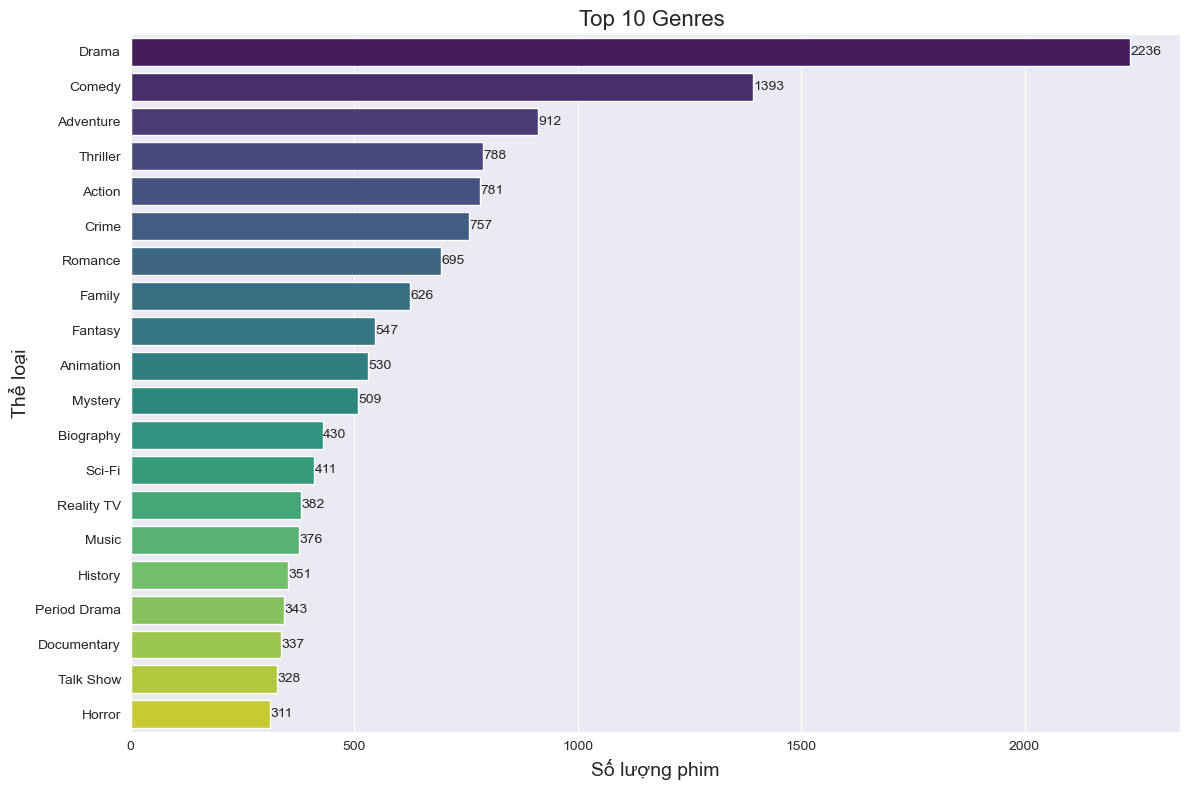

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))  # tăng kích thước để tránh chồng lấn

sns.barplot(
    data=top_10_genres_df,
    x="Count",
    y="Genre",
    palette="viridis",
    legend=False,
    hue = "Genre"
)

plt.title("Top 10 Genres ", fontsize=16)
plt.xlabel("Số lượng phim", fontsize=14)
plt.ylabel("Thể loại", fontsize=14)

# Thêm nhãn số lượng lên trên các cột
for idx, (genre, count) in enumerate(zip(top_10_genres_df["Genre"], top_10_genres_df["Count"])):
    plt.text(count + 1, idx, count, va='center')

plt.tight_layout()
plt.show()

In [88]:
filtered_score_movies = filtered_movies.dropna(subset=["gross", "meta_score", "rating", "no_of_votes", "budget"])
filtered_score_movies.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1541 entries, 2 to 4995
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1541 non-null   object 
 1   genres        1541 non-null   object 
 2   type          1541 non-null   object 
 3   rating        1541 non-null   float64
 4   no_of_votes   1541 non-null   float64
 5   meta_score    1541 non-null   float64
 6   release_date  1541 non-null   float64
 7   gross         1541 non-null   float64
 8   budget        1541 non-null   float64
 9   countries     1541 non-null   object 
 10  url           1541 non-null   object 
 11  ROI           1541 non-null   float64
 12  result        1541 non-null   object 
dtypes: float64(7), object(6)
memory usage: 168.5+ KB


In [89]:
filtered_score_movies

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,1.863654e+07,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.417608,Success
5,Puss in Boots: The Last Wish,"Animal Adventure, Computer Animation, Fairy Ta...",Movie,7.8,200000.0,73.0,2022.0,4.817577e+08,90000000.0,"United States, Japan",https://www.imdb.com/title/tt3915174/?ref_=sr_...,4.352863,Success
18,Superman,"Sci-Fi Epic, Superhero, Urban Adventure, Actio...",Movie,7.4,195000.0,82.0,1978.0,3.004784e+08,55000000.0,"United States, United Kingdom, Switzerland, Pa...",https://www.imdb.com/title/tt0078346/?ref_=sr_...,4.463245,Success
21,Red One,"Holiday Comedy, Action, Adventure, Comedy, Fan...",Movie,6.3,137000.0,34.0,2024.0,1.859008e+08,350000000.0,"United States, Canada",https://www.imdb.com/title/tt14948432/?ref_=sr...,-0.468855,Success
22,Jurassic World: Dominion,"Dinosaur Adventure, Globetrotting Adventure, A...",Movie,5.6,221000.0,38.0,2022.0,1.001978e+09,165000000.0,"United States, China, Malta",https://www.imdb.com/title/tt8041270/?ref_=sr_...,5.072594,Success
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,Far and Away,"Romantic Epic, Western Epic, Adventure, Drama,...",Movie,6.6,70000.0,49.0,1992.0,1.377838e+08,60000000.0,United States,https://www.imdb.com/title/tt0104231/?ref_=sr_...,1.296397,Success
4988,Pale Rider,"Drama, Western",Movie,7.3,67000.0,61.0,1985.0,4.141057e+07,6900000.0,United States,https://www.imdb.com/title/tt0089767/?ref_=sr_...,5.001532,Success
4990,Shanghai Noon,"Buddy Comedy, Martial Arts, Action, Adventure,...",Movie,6.6,138000.0,77.0,2000.0,9.927447e+07,55000000.0,"United States, Hong Kong",https://www.imdb.com/title/tt0184894/?ref_=sr_...,0.804990,Success
4994,The Duel,"Drama, Western",Movie,5.8,12000.0,42.0,2016.0,2.067200e+04,10000000.0,United States,https://www.imdb.com/title/tt2436682/?ref_=sr_...,-0.997933,Fail


In [90]:
avg_score_top_10_genres = []

for _, row in top_10_genres_df.iterrows():
    meta_score = 0
    rating = 0
    no_of_votes = 0
    count = 0
    gross = 0
    budget = 0
    tv_series = 0
    movies = 0
    for _, movie in filtered_score_movies.iterrows():
        if row["Genre"] in movie["genres"]:
            if movie["type"] == "TV Series":
                tv_series += 1
            if movie["type"] == "Movie":
                movies += 1
            count += 1
            meta_score += movie["meta_score"]
            rating += movie["rating"]
            no_of_votes += movie["no_of_votes"]
            gross += movie["gross"]
            budget += movie["budget"]
    if count > 0:
        avg_score_top_10_genres.append({
            "tv_series": tv_series,
            "movies": movies,
            "gross": gross / count,
            "Genre": row["Genre"],
            "meta_score": meta_score / count,
            "rating": rating / count,
            "no_of_votes": no_of_votes / count,
            "budget": budget / count,
        })

avg_score_top_10_genres_df = pd.DataFrame(avg_score_top_10_genres)
avg_score_top_10_genres_df

,tv_series,movies,gross,Genre,meta_score,rating,no_of_votes,budget
0,0,929,1.209424e+08,Drama,67.036598,7.215608,261770.505920,3.763022e+07
1,0,561,1.988978e+08,Comedy,61.351159,6.807487,234248.306595,5.091361e+07
2,0,457,3.833975e+08,Adventure,63.354486,7.005689,350706.126915,9.588714e+07
3,0,321,1.477438e+08,Thriller,64.071651,7.042679,319867.601246,4.497915e+07
4,0,380,3.222157e+08,Action,60.876316,6.945526,377077.631579,9.012200e+07
5,0,208,1.339057e+08,Crime,67.014423,7.281250,356865.865385,3.695748e+07
6,0,320,1.480584e+08,Romance,62.528125,6.852187,185290.937500,3.820390e+07
7,0,264,3.350354e+08,Family,62.189394,6.805682,227245.833333,7.894836e+07
8,0,263,3.769567e+08,Fantasy,61.608365,6.846008,310873.384030,9.055622e+07
9,0,164,3.825714e+08,Animation,67.701220,7.079268,259063.414634,9.216298e+07


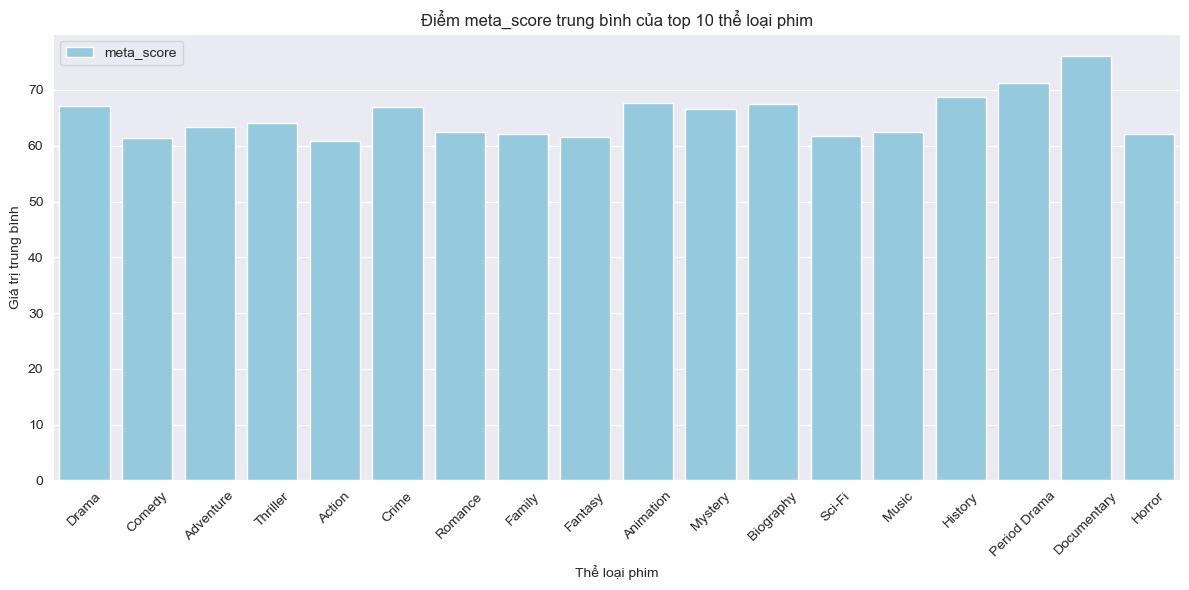

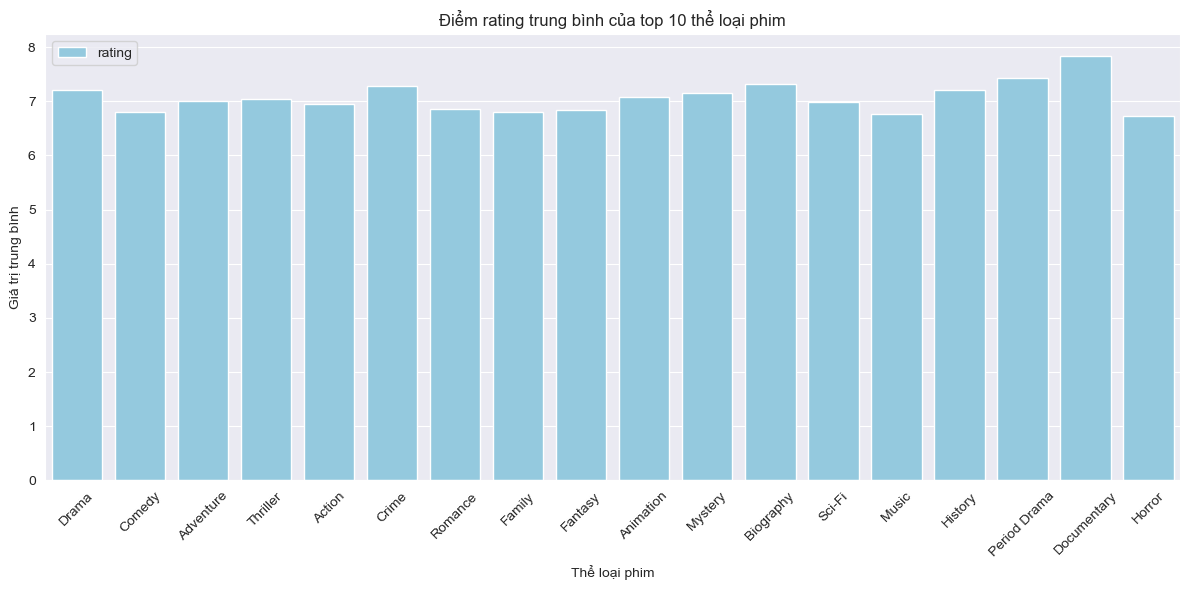

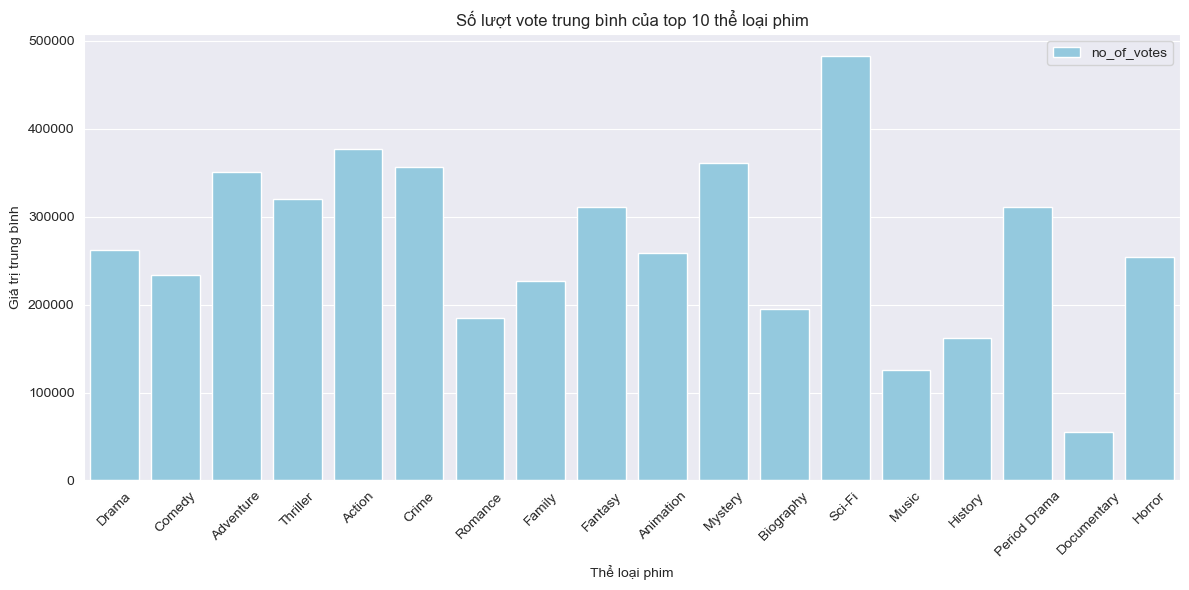

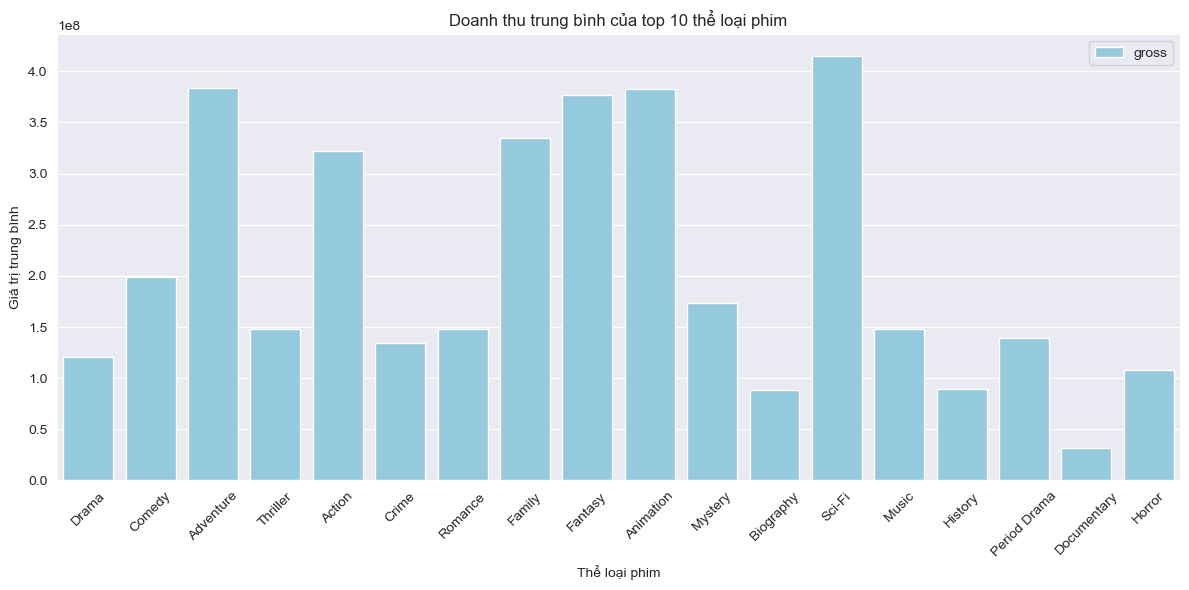

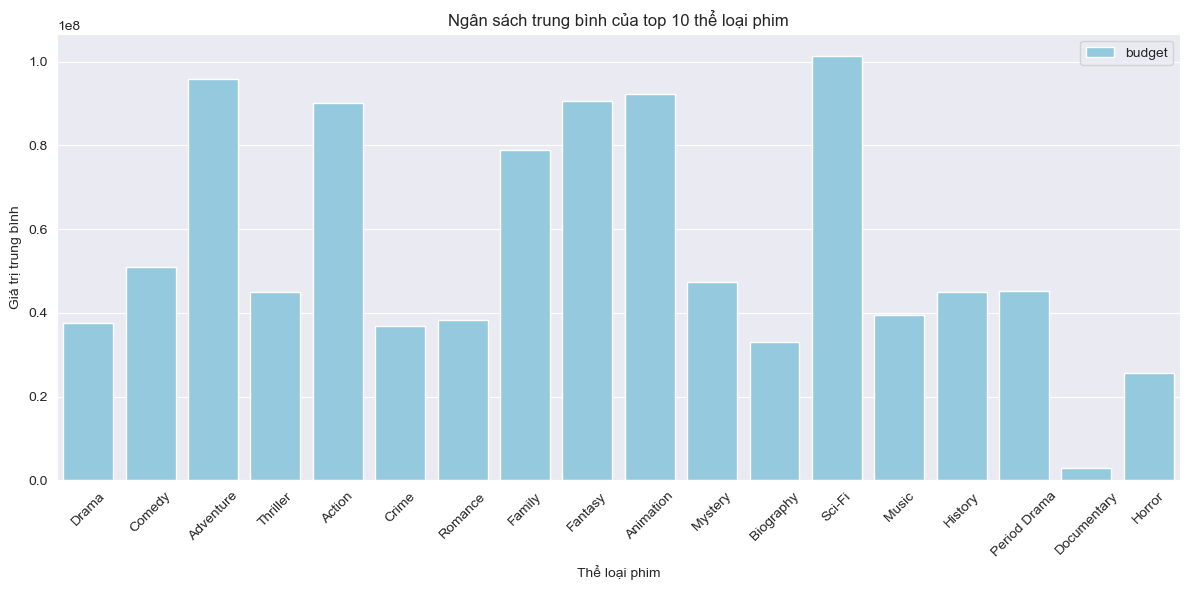

In [91]:
def plot_avg_score(df, column, title):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='Genre', y=column, color='skyblue', label=column)
    
    plt.title(title)
    plt.ylabel('Giá trị trung bình')
    plt.xlabel('Thể loại phim')
    plt.xticks(rotation=45)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_avg_score(avg_score_top_10_genres_df, 'meta_score', 'Điểm meta_score trung bình của top 10 thể loại phim')
plot_avg_score(avg_score_top_10_genres_df, 'rating', 'Điểm rating trung bình của top 10 thể loại phim')
plot_avg_score(avg_score_top_10_genres_df, 'no_of_votes', 'Số lượt vote trung bình của top 10 thể loại phim')
plot_avg_score(avg_score_top_10_genres_df, 'gross', 'Doanh thu trung bình của top 10 thể loại phim')
plot_avg_score(avg_score_top_10_genres_df, 'budget', 'Ngân sách trung bình của top 10 thể loại phim')


In [58]:
print(avg_score_top_10_genres_df["Genre"].unique())


['Drama' 'Comedy' 'Adventure' 'Thriller' 'Action' 'Crime' 'Romance'
 'Family' 'Fantasy' 'Animation' 'Mystery' 'Biography' 'Sci-Fi' 'Music'
 'History' 'Period Drama' 'Documentary' 'Horror']


In [59]:
# Loại bỏ dòng có giá trị NaN hoặc rỗng trong "Genre"
avg_score_top_10_genres_df = avg_score_top_10_genres_df[avg_score_top_10_genres_df["Genre"].notna()]
avg_score_top_10_genres_df = avg_score_top_10_genres_df[avg_score_top_10_genres_df["Genre"] != ""]
# Chuyển cột "Genre" thành biến one-hot
genre_encoded = pd.get_dummies(avg_score_top_10_genres_df["Genre"])

# Ghép với dữ liệu gốc, loại bỏ cột "Genre" gốc
avg_score_top_10_genres_df = avg_score_top_10_genres_df.drop(columns=["Genre"]).join(genre_encoded)
avg_score_top_10_genres_df


,gross,meta_score,rating,no_of_votes,budget,Action,Adventure,Animation,Biography,Comedy,...,Family,Fantasy,History,Horror,Music,Mystery,Period Drama,Romance,Sci-Fi,Thriller
0,1.209424e+08,67.036598,7.215608,261770.505920,3.763022e+07,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.988978e+08,61.351159,6.807487,234248.306595,5.091361e+07,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,3.833975e+08,63.354486,7.005689,350706.126915,9.588714e+07,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.477438e+08,64.071651,7.042679,319867.601246,4.497915e+07,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3.222157e+08,60.876316,6.945526,377077.631579,9.012200e+07,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1.339057e+08,67.014423,7.281250,356865.865385,3.695748e+07,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1.480584e+08,62.528125,6.852187,185290.937500,3.820390e+07,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,3.350354e+08,62.189394,6.805682,227245.833333,7.894836e+07,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
8,3.769567e+08,61.608365,6.846008,310873.384030,9.055622e+07,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9,3.825714e+08,67.701220,7.079268,259063.414634,9.216298e+07,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


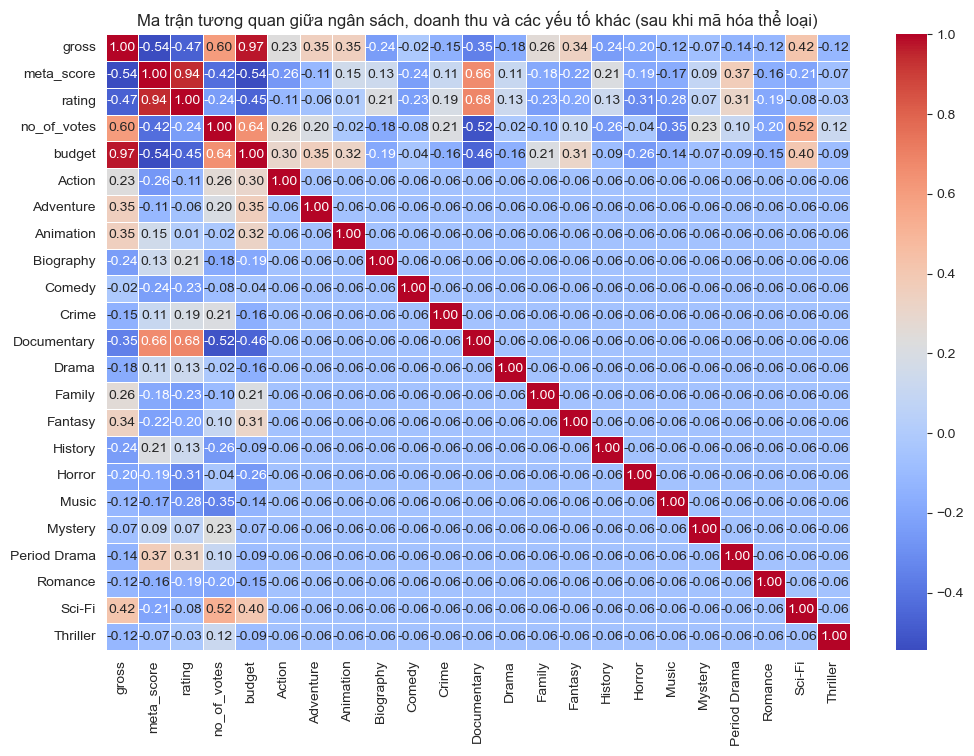

In [60]:

# Tính ma trận tương quan sau khi mã hóa
correlation_matrix = avg_score_top_10_genres_df.corr()

# Vẽ heatmap hiển thị tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan giữa ngân sách, doanh thu và các yếu tố khác (sau khi mã hóa thể loại)")
plt.show()